In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Thing algorythm
def thing(img):
    # get shape
    H, W, C = img.shape
    
    # prepare out image
    out = np.zeros((H, W), dtype=np.int)
    out[img[..., 0] > 0] = 1
    
    count = 1
    while count > 0:
        count = 0
        tmp = out.copy()
        # each pixel (rasta scan)
        for y in range(H):
            for x in range(W):
                # skip black pixel
                if out[y, x] < 1:
                    continue
                    
                # count satisfied conditions
                judge = 0
                ## condition 1
                if (tmp[y, min(x+1, W-1)] + tmp[max(y-1, 0), x] + tmp[y, max(x-1, 0)] + tmp[min(y+1, H-1), x]) < 4:
                    judge += 1
                    
                ## conndition 2
                c = 0
                c += (tmp[y,min(x+1, W-1)] - tmp[y, min(x+1, W-1)] * tmp[max(y-1, 0),min(x+1, W-1)] * tmp[max(y-1, 0), x])
                c += (tmp[max(y-1,0), x] - tmp[max(y-1,0), x] * tmp[max(y-1, 0), max(x-1, 0)] * tmp[y, max(x-1, 0)])
                c += (tmp[y, max(x-1, 0)] - tmp[y,max(x-1, 0)] * tmp[min(y+1, H-1), max(x-1, 0)] * tmp[min(y+1, H-1), x])
                c += (tmp[min(y+1, H-1), x] - tmp[min(y+1, H-1), x] * tmp[min(y+1, H-1), min(x+1, W-1)] * tmp[y, min(x+1, W-1)])
                if c == 1:
                    judge +=1
                    
                ## condition 3
                if np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) >= 4:
                    judge += 1
                    
                # if all conditions are satisfied
                if judge == 3:
                    out[y, x] = 0
                    count += 1
                    
    out = out.astype(np.uint8) * 255
    
    return out

In [4]:
#  Hilditch Thing algorythm
def hildtch(img):
    # get shape
    H, W, C = img.shape
    
    # prepare out image
    out = np.zeros((H, W), dtype=np.int)
    out[img[..., 0] > 0] = 1
    
    # inverse pixel value
    tmp = out.copy()
    _tmp = 1 - tmp
    
    count = 1
    while count > 0:
        count = 0
        tmp = out.copy()
        _tmp = 1 - tmp
        
        tmp2 = out.copy()
        _tmp2 = 1 - tmp2
        
        # each pixel 
        for y in range(H):
            for x in range(W):
                # skip black pixel
                if out[y, x] < 1:
                    continue
                    
                # count satisfied conditions
                judge = 0
                ## condition 1
                if (tmp[y, min(x+1, W-1)] + tmp[max(y-1, 0), x] + tmp[y, max(x-1, 0)] + tmp[min(y+1, H-1), x]) == 0:
                    judge += 1
                    
                ## conndition 2
                c = 0
                c += (_tmp[y, min(x+1, W-1)] - _tmp[y, min(x+1, W-1)] * _tmp[max(y-1, 0), min(x+1, W-1)] * _tmp[max(y-1, 0), x])
                c += (_tmp[max(y-1, 0), x] - _tmp[max(y-1, 0), x] * _tmp[max(y-1, 0), max(x-1, 0)] * _tmp[y, max(x-1, 0)])
                c += (_tmp[y, max(x-1, 0)] - _tmp[y, max(x-1, 0)] * _tmp[min(y+1, H-1), max(x-1, 0)] * _tmp[min(y+1, H-1), x])
                c += (_tmp[min(y+1, H-1), x] - _tmp[min(y+1, H-1), x] * _tmp[min(y+1, H-1), min(x+1, W-1)] * _tmp[y, min(x+1, W-1)])
                if c == 1:
                    judge += 1
                    
                ## condition 3
                if np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) >= 3:
                    judge += 1
                    
                ## condition 4
                if np.sum(tmp[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) >= 2:
                    judge += 1
                    
                ## condition 5
                _tmp2 = 1- out
                
                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * (1 - tmp[max(y-1, 0), max(x-1, 0)]) * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), max(x-1,0 )] != tmp[max(y-1, 0), max(x-1, 0)]):
                    judge += 1
                    
                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * (1 - tmp[max(y-1, 0), x]))
                c += ((1-tmp[max(y-1, 0), x]) - (1 - tmp[max(y-1, 0), x]) * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1,0 )] - _tmp2[y, max(x-1,0 )] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), x] != tmp[max(y-1, 0), x]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * (1 - tmp[max(y-1, 0), min(x+1, W-1)]) * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * _tmp2[y, max(x-1, 0)])
                c += (_tmp2[y, max(x-1, 0)] - _tmp2[y, max(x-1, 0)] * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[max(y-1, 0), min(x+1, W-1)] != tmp[max(y-1, 0), min(x+1, W-1)]):
                    judge += 1

                c = 0
                c += (_tmp2[y, min(x+1, W-1)] - _tmp2[y, min(x+1, W-1)] * _tmp2[max(y-1, 0), min(x+1, W-1)] * _tmp2[max(y-1, 0), x])
                c += (_tmp2[max(y-1, 0), x] - _tmp2[max(y-1, 0), x] * _tmp2[max(y-1, 0), max(x-1, 0)] * (1 - tmp[y, max(x-1, 0)]))
                c += ((1 - tmp[y, max(x-1, 0)]) - (1 - tmp[y, max(x-1, 0)]) * _tmp2[min(y+1, H-1), max(x-1, 0)] * _tmp2[min(y+1, H-1), x])
                c += (_tmp2[min(y+1, H-1), x] - _tmp2[min(y+1, H-1), x] * _tmp2[min(y+1, H-1), min(x+1, W-1)] * _tmp2[y, min(x+1, W-1)])
                if c == 1 or (out[y, max(x-1, 0)] != tmp[y, max(x-1, 0)]):
                    judge += 1
                
                if judge >= 8:
                    out[y, x] = 0
                    count += 1
    
    out = out.astype(np.uint8) * 255
    
    return out

In [5]:
# Zhang Suen thining algorythm
def Zhang_Suen_thining(img):
    # get shape
    H, W, C = img.shape

    # prepare out image
    out = np.zeros((H, W), dtype=np.int)
    out[img[..., 0] > 0] = 1

    # inverse
    out = 1 - out

    while True:
        s1 = []
        s2 = []

        # step 1 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                    continue

                # condition 5
                if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s1.append([y, x])

        for v in s1:
            out[v[0], v[1]] = 1

        # step 2 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y, x-1] < 1:
                    continue

                # condition 5
                if out[y-1, x] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s2.append([y, x])

        for v in s2:
            out[v[0], v[1]] = 1

        # if not any pixel is changed
        if len(s1) < 1 and len(s2) < 1:
            break

    out = 1 - out
    out = out.astype(np.uint8) * 255

    return out

In [6]:
img = cv2.imread("../assets/gazo.png").astype(np.float32)

In [8]:
thin = thing(img)
hildtch = hildtch(img)
zhang = Zhang_Suen_thining(img)

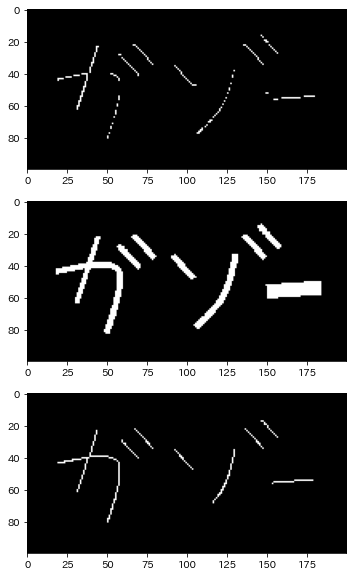

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.imshow(thin, cmap="gray")
plt.subplot(312)
plt.imshow(hildtch, cmap="gray")
plt.subplot(313)
plt.imshow(zhang, cmap="gray")